In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
len(X_train), len(X_test),len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

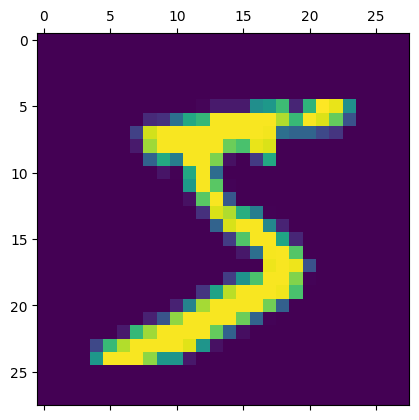

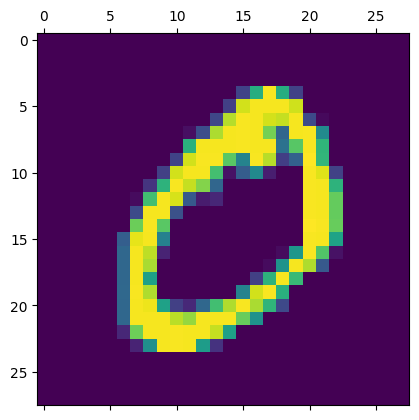

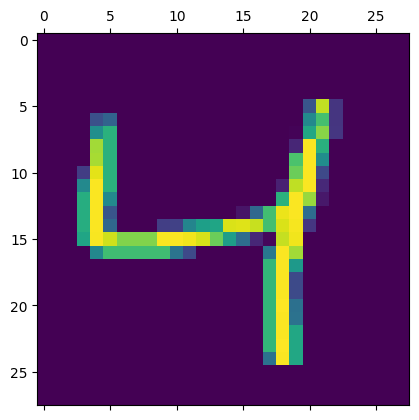

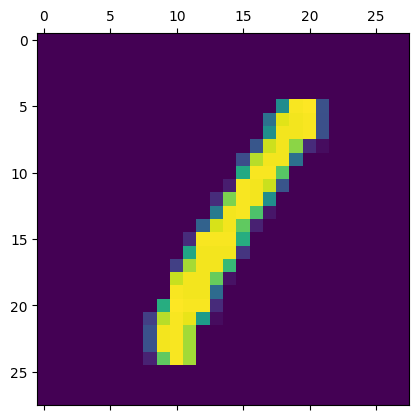

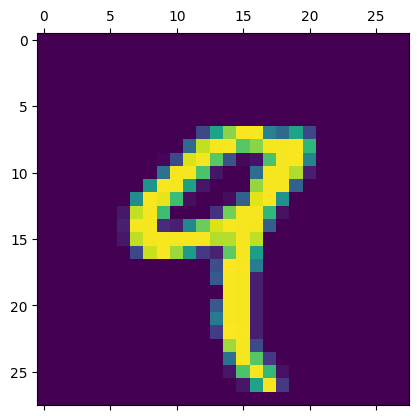

In [15]:
for i in range(5):
    plt.matshow(X_train[i])
    plt.show()

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
X_test = X_test/255
X_train = X_train /255

In [17]:
#create model
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10 , activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs = 10)

C:\Users\Mannu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.8082 - loss: 0.7344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9125 - loss: 0.3127
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9206 - loss: 0.2839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.9243 - loss: 0.2696
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.9266 - loss: 0.2650
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9281 - loss: 0.2583
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 739us/step - accuracy: 0.9300 - loss: 0.2550
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9286 - loss: 0.2591
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.9308 - loss: 0.2506
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9331 - loss: 0.2463


In [21]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


array([[4.5493711e-03, 1.1488565e-08, 1.3384591e-02, ..., 9.9985284e-01,
        9.1064729e-02, 6.8459344e-01],
       [2.8637108e-01, 4.6933219e-03, 9.9976689e-01, ..., 1.8001735e-15,
        8.4574699e-02, 3.0812380e-12],
       [1.6174003e-04, 9.9487984e-01, 7.3356032e-01, ..., 4.1965194e-02,
        2.9947466e-01, 3.4983154e-02],
       ...,
       [1.7553524e-06, 3.4763741e-07, 9.3908992e-04, ..., 2.2908475e-01,
        5.8993548e-01, 7.6976126e-01],
       [1.7435836e-05, 3.1119034e-05, 4.6283338e-05, ..., 9.9854760e-06,
        6.4834559e-01, 1.4493163e-05],
       [1.3136433e-03, 1.3196176e-11, 1.8850033e-01, ..., 1.6965568e-11,
        3.7400303e-05, 7.3703164e-09]], dtype=float32)

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

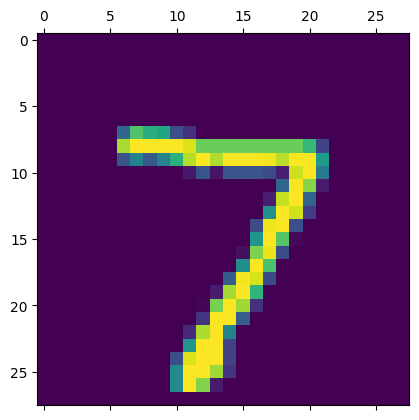

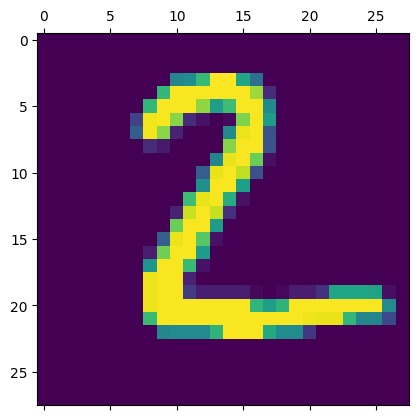

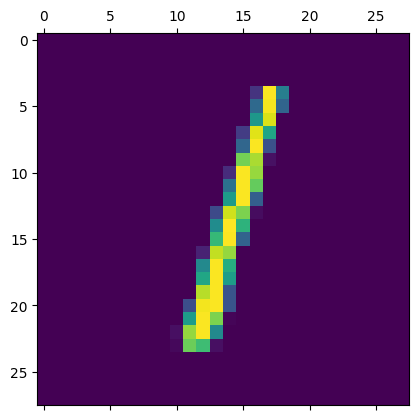

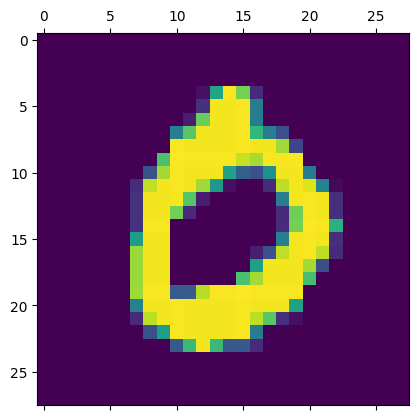

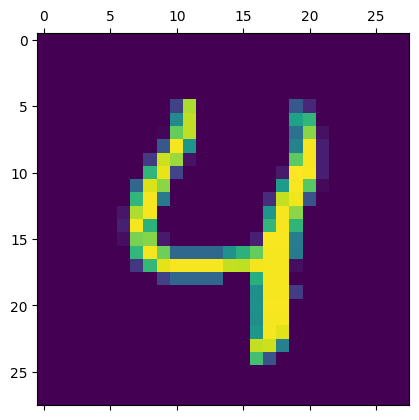

In [24]:
for i in range(5):
    plt.matshow(X_test[i])
    plt.show()

In [27]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    4,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  937,   16,    7,    3,   12,    9,   32,    3],
       [   2,    0,   19,  932,    0,   18,    2,   10,   21,    6],
       [   1,    1,    5,    2,  923,    0,    9,    5,    9,   27],
       [  10,    2,    2,   45,    8,  767,   16,    8,   29,    5],
       [  13,    3,    7,    1,    7,    9,  916,    1,    1,    0],
       [   1,    6,   23,    5,    6,    1,    0,  955,    3,   28],
       [   7,    8,    7,   22,    8,   26,   10,   12,  867,    7],
       [  11,    7,    1,   12,   27,    5,    0,   23,    6,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

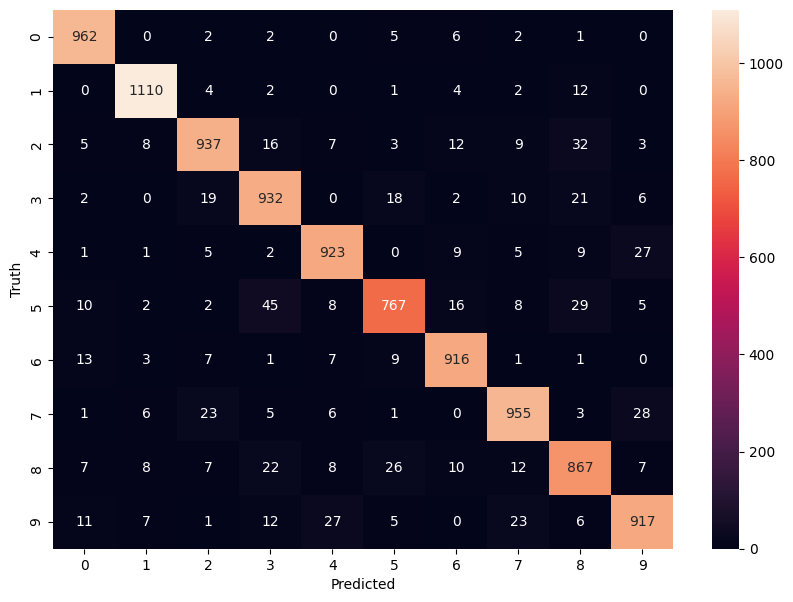

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
#creation of hidden layer neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train , y_train, epochs = 10)

C:\Users\Mannu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8725 - loss: 0.4488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9618 - loss: 0.1347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9734 - loss: 0.0887
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0478
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0388
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9908 - loss: 0.0310
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9931 - loss: 0.0239
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9938 - loss: 0.0210
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9959 - loss: 0.0155


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


Text(95.72222222222221, 0.5, 'Truth')

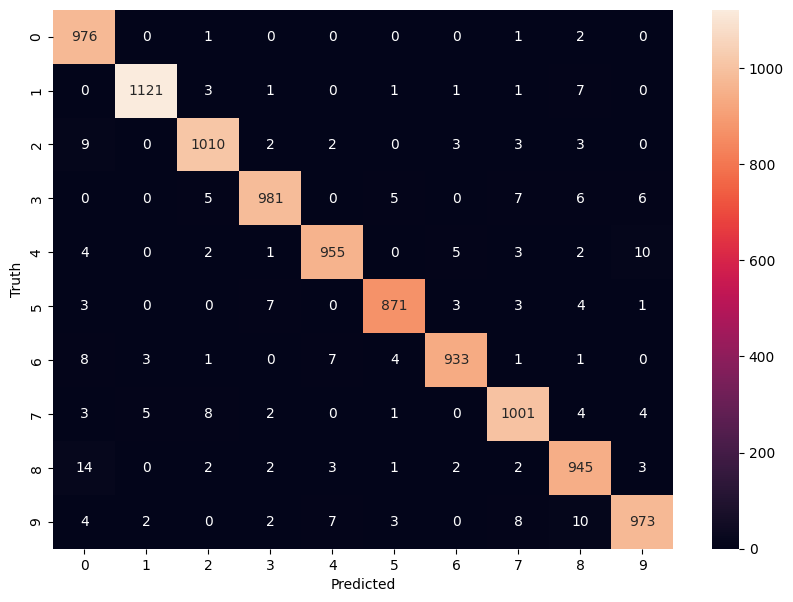

In [31]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9740 - loss: 0.0993


[0.08531107753515244, 0.9765999913215637]